# Bank Marketing Campaign

## Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the csv file

In [2]:
bankData = pd.read_csv("Dataset/Bank Data.csv",delimiter=";")
bankData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Exploring the dataset

In [3]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bankData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Checking for missing values

In [5]:
bankData.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Checking the unique values in categorical columns

In [39]:
catCols = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week','poutcome', 'y']
numCols = ['age', 'duration', 'campaign', 'pdays','previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

In [7]:
bankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
def findUnique(data):
    return data.unique()

In [9]:
print("Unique Values: ")
for col in catCols:
    print(col,": ",findUnique(bankData[col]))

Unique Values: 
job :  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital :  ['married' 'single' 'divorced' 'unknown']
education :  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default :  ['no' 'unknown' 'yes']
housing :  ['no' 'yes' 'unknown']
loan :  ['no' 'yes' 'unknown']
contact :  ['telephone' 'cellular']
month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week :  ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome :  ['nonexistent' 'failure' 'success']
y :  ['no' 'yes']


## Checking for Outliers

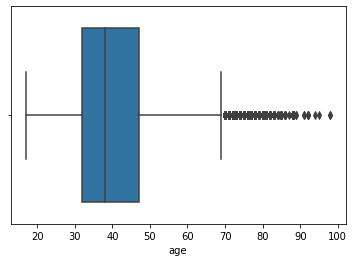

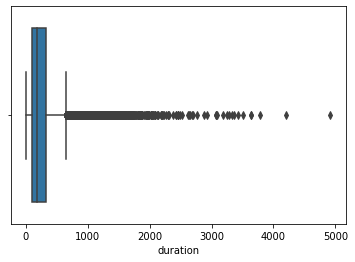

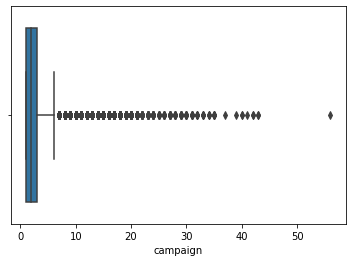

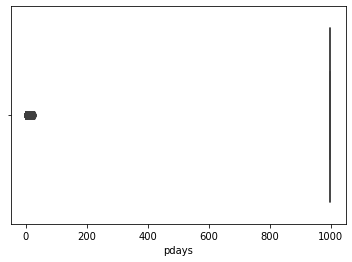

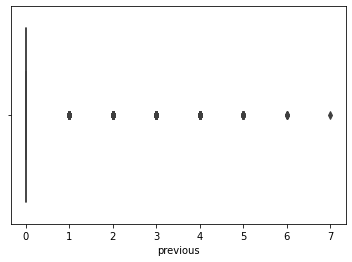

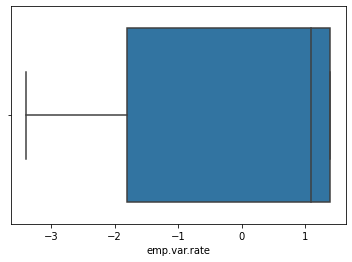

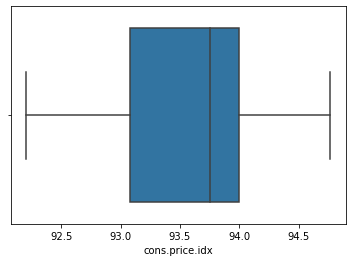

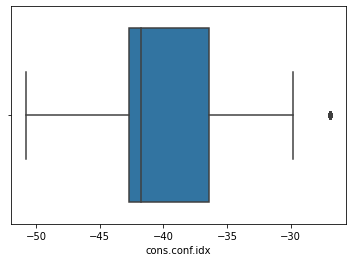

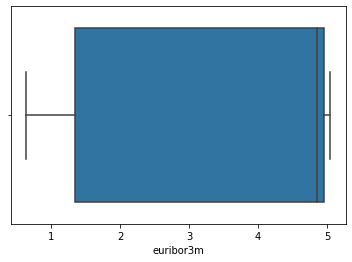

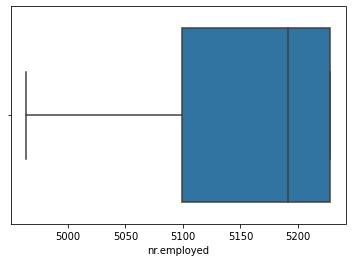

In [10]:
for col in numCols:
    sns.boxplot(data=bankData,x=col)
    plt.show()

In [11]:
#Duration
bankData.loc[bankData["duration"]>4000]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.406,5195.8,no


In [12]:
#Campaign
bankData.loc[bankData["campaign"]>50]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,56,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [13]:
#Cons.conf.idx
bankData.loc[bankData["cons.conf.idx"]>-30]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37887,53,admin.,married,university.degree,unknown,yes,no,cellular,sep,tue,...,5,999,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,no
37888,32,admin.,single,university.degree,no,yes,yes,cellular,sep,tue,...,2,999,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,no
37889,52,admin.,married,unknown,no,no,no,telephone,sep,tue,...,5,999,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,no
37890,39,entrepreneur,married,basic.6y,no,yes,no,cellular,sep,tue,...,2,16,1,success,-3.4,92.379,-29.8,0.819,5017.5,yes
37891,32,admin.,single,university.degree,no,yes,no,cellular,sep,tue,...,2,999,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38596,69,retired,married,basic.4y,no,yes,yes,cellular,oct,fri,...,3,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
38597,18,student,single,basic.6y,no,no,yes,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
38598,59,retired,divorced,basic.4y,no,yes,no,telephone,oct,fri,...,4,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,no
38599,37,admin.,single,university.degree,no,no,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes


In [14]:
#Removing the rows [4107, 22192, 24091]
rowsToRemove = [4107, 22192, 24091]
bankData = bankData.drop(rowsToRemove,axis=0)

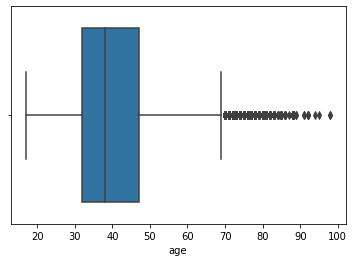

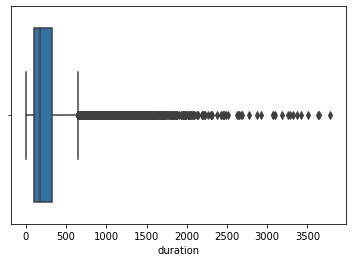

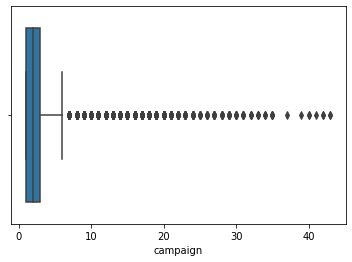

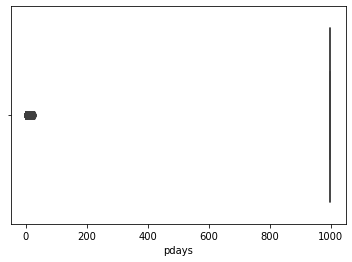

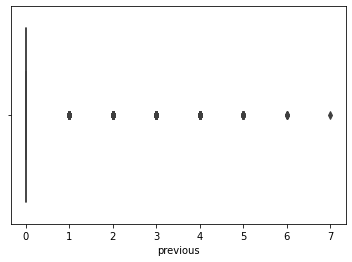

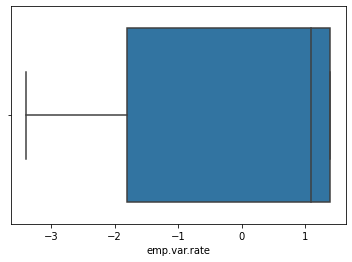

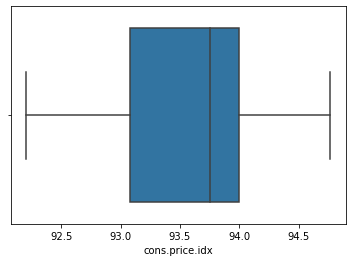

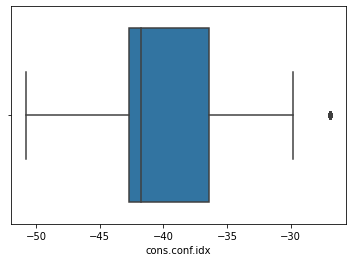

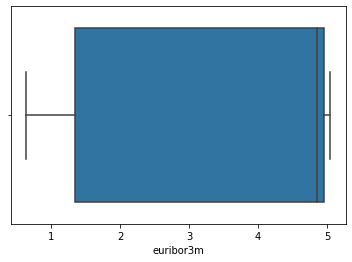

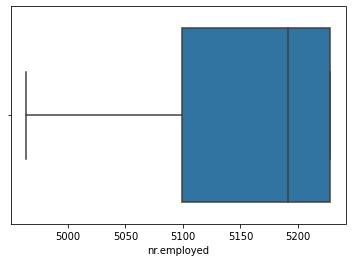

In [15]:
#Box plots after removing the rows with outliers
for col in numCols:
    sns.boxplot(data=bankData,x=col)
    plt.show()

## Checking for Duplicate Data

In [16]:
bankData.loc[bankData.duplicated() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [17]:
#Remove Duplicates
bankData = bankData.drop_duplicates()

In [18]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41173 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41173 non-null  int64  
 1   job             41173 non-null  object 
 2   marital         41173 non-null  object 
 3   education       41173 non-null  object 
 4   default         41173 non-null  object 
 5   housing         41173 non-null  object 
 6   loan            41173 non-null  object 
 7   contact         41173 non-null  object 
 8   month           41173 non-null  object 
 9   day_of_week     41173 non-null  object 
 10  duration        41173 non-null  int64  
 11  campaign        41173 non-null  int64  
 12  pdays           41173 non-null  int64  
 13  previous        41173 non-null  int64  
 14  poutcome        41173 non-null  object 
 15  emp.var.rate    41173 non-null  float64
 16  cons.price.idx  41173 non-null  float64
 17  cons.conf.idx   41173 non-null  floa

## Checking PDays

In [19]:
bankData["pdays"].value_counts()

pdays
999    39658
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [20]:
bankData["poutcome"].value_counts()

poutcome
nonexistent    35548
failure         4252
success         1373
Name: count, dtype: int64

In [21]:
bankData.loc[(bankData["pdays"]==999) & (bankData["poutcome"]=='failure')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24113,29,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,...,1,999,1,failure,-0.1,93.200,-42.0,4.245,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,admin.,married,university.degree,no,no,no,telephone,nov,wed,...,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


In [22]:
#Converting the value of poutcome for rows with value 999 in pdays
bankData.loc[bankData["pdays"]==999,"poutcome"] = "nonexistent"
bankData.loc[(bankData["pdays"]==999) & (bankData["poutcome"]=='failure')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [23]:
bankData.loc[(bankData["pdays"]==999),"poutcome"].value_counts()

poutcome
nonexistent    39658
Name: count, dtype: int64

## Final Cleaned Dataset

In [24]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41173 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41173 non-null  int64  
 1   job             41173 non-null  object 
 2   marital         41173 non-null  object 
 3   education       41173 non-null  object 
 4   default         41173 non-null  object 
 5   housing         41173 non-null  object 
 6   loan            41173 non-null  object 
 7   contact         41173 non-null  object 
 8   month           41173 non-null  object 
 9   day_of_week     41173 non-null  object 
 10  duration        41173 non-null  int64  
 11  campaign        41173 non-null  int64  
 12  pdays           41173 non-null  int64  
 13  previous        41173 non-null  int64  
 14  poutcome        41173 non-null  object 
 15  emp.var.rate    41173 non-null  float64
 16  cons.price.idx  41173 non-null  float64
 17  cons.conf.idx   41173 non-null  floa

# Exploratory Data Analysis

## Univariate Analysis

<Axes: xlabel='age', ylabel='Density'>

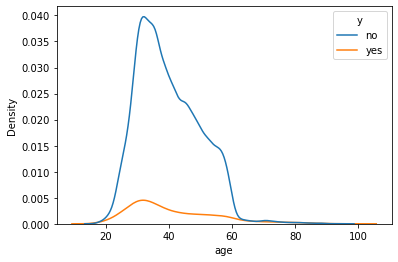

In [26]:
sns.kdeplot(data=bankData, x="age",hue="y")

In [28]:
newCatCols = catCols.copy()
newCatCols.remove("y")
newCatCols.remove("poutcome")
newCatCols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week']

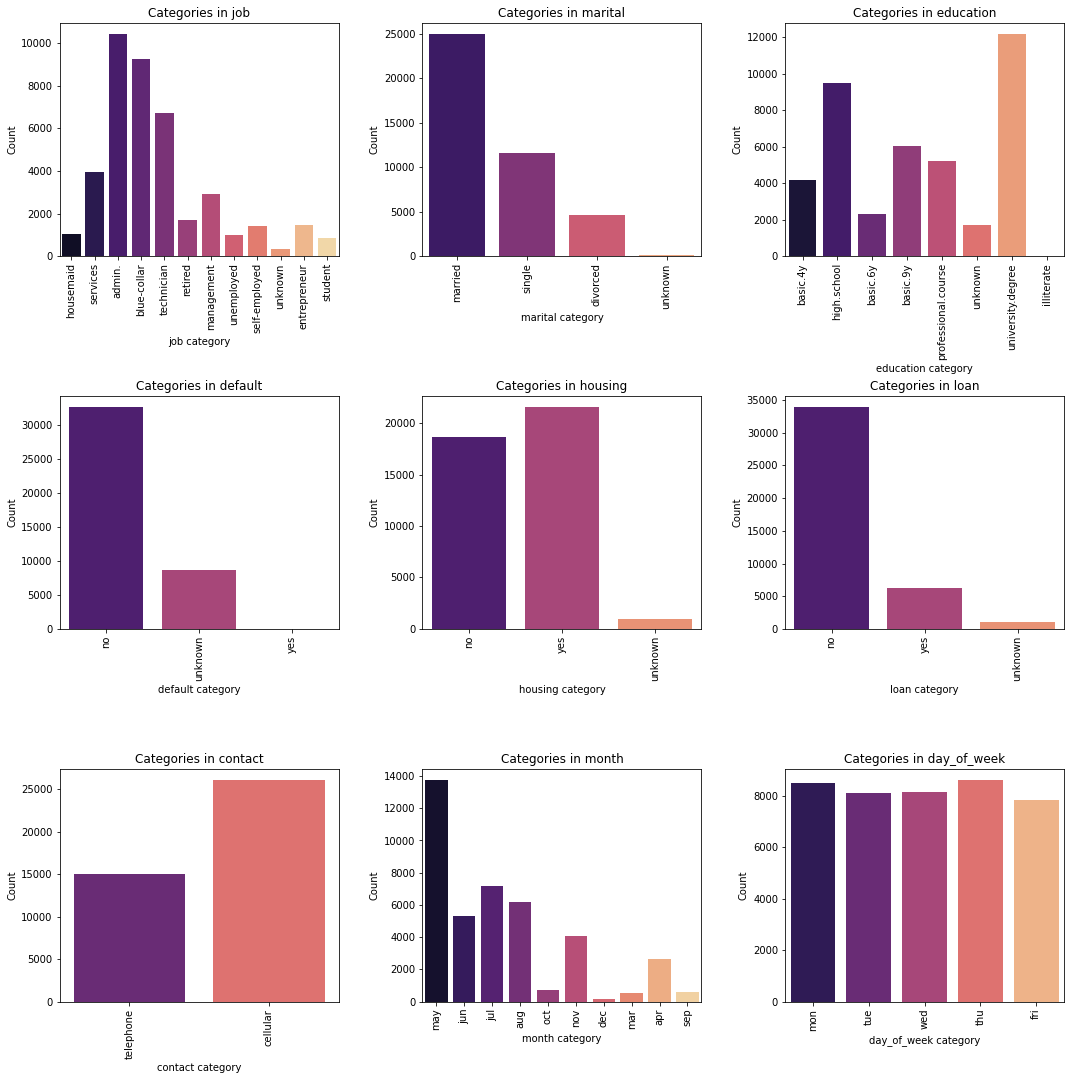

In [31]:
figure, axes = plt.subplots(3,3,figsize=(18, 18),gridspec_kw={'hspace': 0.6, 'wspace': 0.3})
n=0
for i in range(3):
    for j in range(3):
        ax = axes[i,j]
        ax.set_xticks(range(bankData[newCatCols[n]].nunique()))
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        ax.set_title("Categories in "+ newCatCols[n])
        sns.countplot(data=bankData, x=newCatCols[n],ax=ax,palette="magma")
        ax.set_xlabel(newCatCols[n]+" category")
        ax.set_ylabel("Count")
        n+=1

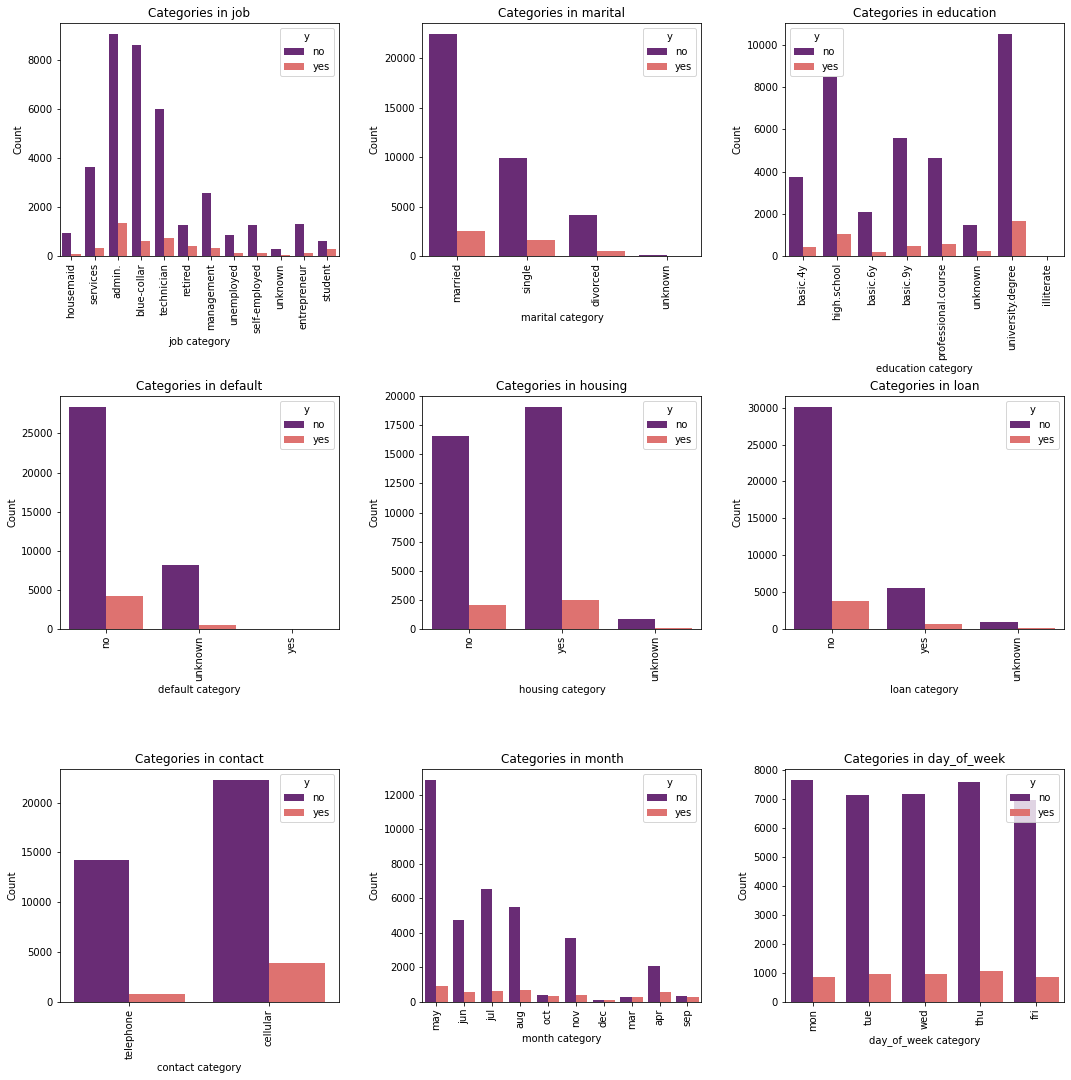

In [29]:
figure, axes = plt.subplots(3,3,figsize=(18, 18),gridspec_kw={'hspace': 0.6, 'wspace': 0.3})
n=0
for i in range(3):
    for j in range(3):
        ax = axes[i,j]
        ax.set_xticks(range(bankData[newCatCols[n]].nunique()))
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        ax.set_title("Categories in "+ newCatCols[n])
        sns.countplot(data=bankData, x=newCatCols[n],ax=ax,palette="magma",hue="y")
        ax.set_xlabel(newCatCols[n]+" category")
        ax.set_ylabel("Count")
        n+=1

### Ploting the based on the percentage of people in each category saying yes or no

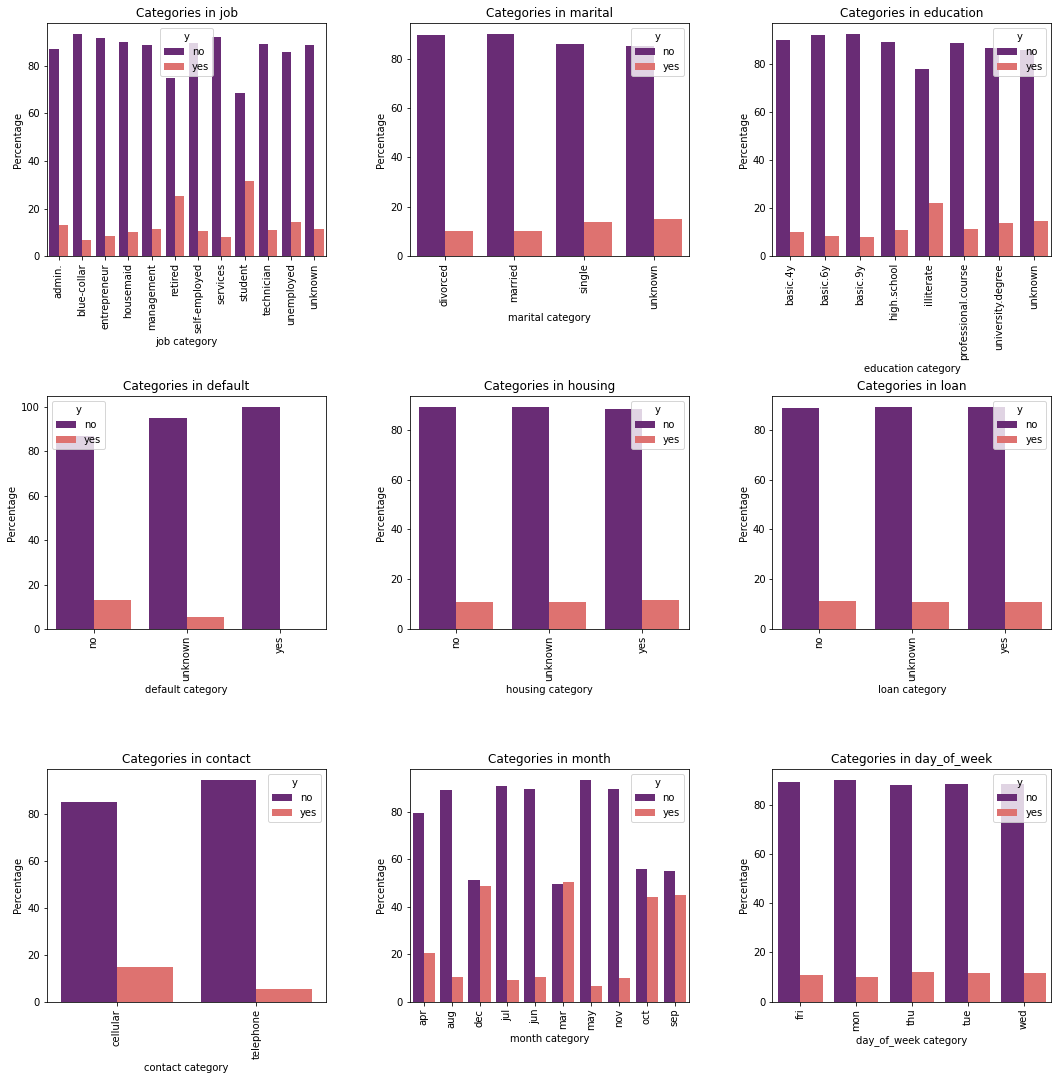

In [30]:
figure, axes = plt.subplots(3,3,figsize=(18, 18),gridspec_kw={'hspace': 0.6, 'wspace': 0.3})
n=0
for i in range(3):
    for j in range(3):
        ax = axes[i,j]
        ax.set_xticks(range(bankData[newCatCols[n]].nunique()))
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        counts = bankData.groupby([newCatCols[n], "y"]).size().reset_index(name="count")
        totals = counts.groupby(newCatCols[n])["count"].transform("sum")
        counts["percentage"] = (counts["count"] / totals) * 100
        ax.set_title("Categories in "+ newCatCols[n])
        sns.barplot(data=counts, x=newCatCols[n],y="percentage",ax=ax,palette="magma",hue="y")
        ax.set_xlabel(newCatCols[n]+" category")
        ax.set_ylabel("Percentage")
        n+=1

In [48]:
socioEconomicAttributes = ['emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

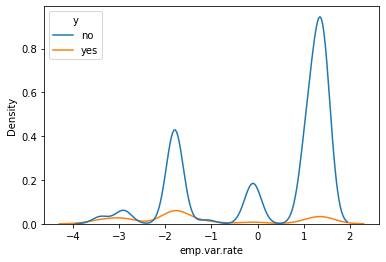

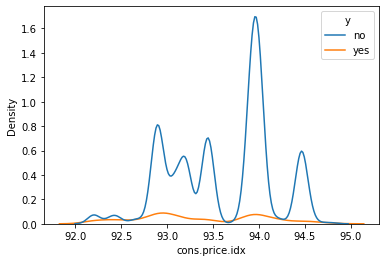

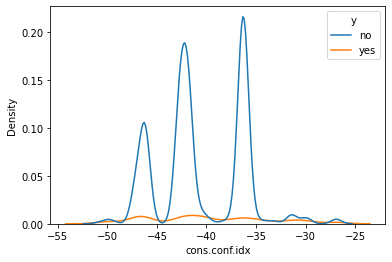

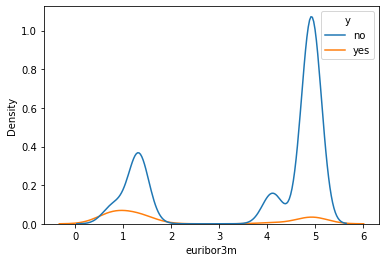

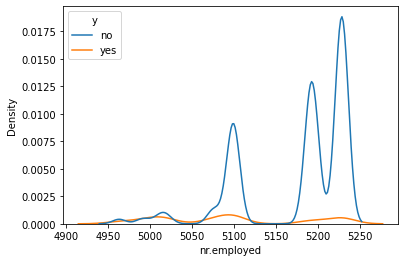

In [119]:
for attr in socioEconomicAttributes:
    sns.kdeplot(data=bankData,x=attr,hue="y")
    plt.show()

In [33]:
bankData[bankData["education"]=="illiterate"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5393,45,blue-collar,married,illiterate,unknown,no,yes,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6928,45,blue-collar,married,illiterate,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
12383,51,admin.,married,illiterate,unknown,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
14445,55,blue-collar,married,illiterate,no,yes,no,cellular,jul,tue,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
14486,55,blue-collar,married,illiterate,no,no,no,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
16269,60,housemaid,married,illiterate,unknown,yes,no,cellular,jul,tue,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
17739,54,blue-collar,married,illiterate,unknown,yes,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
22402,45,blue-collar,married,illiterate,no,yes,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
22642,44,blue-collar,married,illiterate,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
26680,34,self-employed,married,illiterate,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no


# Models for Prediction

## Import Required libraries

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

### One hot encoding the categorical columns

In [68]:
newBankData = pd.get_dummies(bankData.drop("y",axis=1))

### Splitting the data into train and test sets

In [69]:
X = newBankData
y = bankData["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Scaling the Socio-Economic attributes

In [71]:
ss = StandardScaler()
scaled_socioEconomicAttributes_train = pd.DataFrame(ss.fit_transform(X_train[socioEconomicAttributes]),columns=socioEconomicAttributes)
scaled_socioEconomicAttributes_test = pd.DataFrame(ss.transform(X_test[socioEconomicAttributes]),columns=socioEconomicAttributes)
X_train.update(scaled_socioEconomicAttributes_train)
X_test.update(scaled_socioEconomicAttributes_test)

## Logistic Regression

In [87]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [88]:
accuracy_score(y_pred,y_test)

0.9130114807182809

## Decision Tree Classifier

In [89]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
y_pred = dtc_model.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [90]:
accuracy_score(y_pred,y_test)

0.8222696496909038

## Random Forest Classifier

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
y_pred = rfc_model.predict(X_test)
y_pred

In [92]:
accuracy_score(y_pred,y_test)

0.9105092728878422

## SVM

In [85]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [86]:
accuracy_score(y_pred,y_test)

0.8999116867824551